In [11]:
from functions import *

In [12]:
all_path = '/Users/zumiis/final_not4git/multivariate data/us_with_all_countries.csv'
df_all_countries = import_main_df(all_path)
df_all_countries.head()

,AUD_IR,CND_IR,CNY_IR,JPY_IR,KRW_IR,MXN_IR,NZD_IR,NOK_IR,SGD_IR,ZAR_IR,...,THB_trade,MXN_trade,USD_USD,price_gold,fc_year,USD_IR,USD_GDP,USD_UE,h1n1,USD_trade
0,0.05,0.0475,0.0324,0.000205,0.0475,0.1529,0.0525,0.0584,0.0275,0.1175,...,1.275687,8.59938,0.726696,290.3,0,0.055,0.016996,0.04,0,0.639998
1,0.05,0.0475,0.0324,0.000205,0.0475,0.1529,0.0525,0.0584,0.0275,0.1175,...,1.275687,8.59938,0.723608,281.5,0,0.055,0.016996,0.04,0,0.639998
2,0.05,0.0475,0.0324,0.000205,0.0475,0.1529,0.0525,0.0584,0.0275,0.1175,...,1.275687,8.59938,0.723627,280.5,0,0.055,0.016996,0.04,0,0.639998
3,0.05,0.0475,0.0324,0.000205,0.0475,0.1529,0.0525,0.0584,0.0275,0.1175,...,1.275687,8.59938,0.724439,279.4,0,0.055,0.016996,0.04,0,0.639998
4,0.05,0.0475,0.0324,0.000205,0.0475,0.1529,0.0525,0.0584,0.0275,0.1175,...,1.275687,8.59938,0.727113,282.1,0,0.055,0.016996,0.04,0,0.639998


In [13]:
country_code = 'CND'

In [14]:
df_train, dates_list, var_list = other_country_vars(df_all_countries, country_code)

Shape of training dataset = (4997, 9)
Number of dates = 4997
Selected features: ['Time Series', 'CND_IR', 'CND_GDP', 'CND_UE', 'CND_USD', 'CND_trade', 'fc_year', 'price_gold', 'h1n1']


In [15]:
df_matrixtrain, df_matrixtrain_scaled, scaler, scaler_y = matrix_and_scale(df_train, var_list)

Shape of training matrix = (4997, 8)
Shape of scaled training matrix = (4997, 8)


In [16]:
n_future = 365
n_past = 3
X_train, y_train = data_for_model(n_future, n_past, df_matrixtrain_scaled)

Shape of X_train = (4630, 3, 8)
Shape of y_train = (4630, 1)


In [17]:
#units, dropout 
model = make_model(n_past, df_matrixtrain_scaled, 50, 0.20)

In [18]:
#epoch, batches
history, fitted_model = fit_training(model, X_train, y_train, 100, 16)

Epoch 1/100
290/290 [==============================] - 2s 5ms/step - loss: 0.5113
Epoch 2/100
290/290 [==============================] - 2s 5ms/step - loss: 0.3830
Epoch 3/100
290/290 [==============================] - 2s 6ms/step - loss: 0.4195
Epoch 4/100
290/290 [==============================] - 2s 5ms/step - loss: 0.3745
Epoch 5/100
290/290 [==============================] - 2s 6ms/step - loss: 0.4025
Epoch 6/100
290/290 [==============================] - 2s 6ms/step - loss: 0.5850
Epoch 7/100
290/290 [==============================] - 2s 6ms/step - loss: 0.5833
Epoch 8/100
290/290 [==============================] - 2s 6ms/step - loss: 0.4218
Epoch 9/100
290/290 [==============================] - 2s 6ms/step - loss: 0.3400
Epoch 10/100
290/290 [==============================] - 2s 6ms/step - loss: 0.3083
Epoch 11/100
290/290 [==============================] - 2s 6ms/step - loss: 0.2599
Epoch 12/100
290/290 [==============================] - 2s 6ms/step - loss: 0.2369
Epoch 13/100


In [19]:
fitted_model.save('/Users/zumiis/final_not4git/for_deploy/trained_model_on_canada.h5')

In [20]:
#to load the already trained model 
#fitted_model = load_model('/Users/zumiis/final/for_deploy/trained_model_on_canada.h5', compile=True)

In [21]:
future_datelist = get_future_dates(dates_list, n_future)
pred_future, pred_train = get_predictions(fitted_model, X_train, n_future, n_past)
y_pred_future, y_pred_train = inverse_predictions(pred_future, pred_train, scaler_y)



In [22]:
df_future_predictions, df_training_predictions = pred_to_dataframe(y_pred_future, country_code, future_datelist, 
                                                                    y_pred_train, dates_list, n_past, n_future)

In [23]:
# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
df_training_predictions.index = df_training_predictions.index.to_series().apply(datetime_to_timestamp)

print(df_training_predictions.tail(3))
print(df_future_predictions.head(3))

             CND_USD
2019-12-26  1.324713
2019-12-27  1.325232
2019-12-30  1.325856
             CND_USD
2019-12-30  1.322241
2019-12-31  1.322609
2020-01-01  1.322459


In [24]:
dataset_train = dataset_for_visual(df_train, var_list, dates_list)

In [25]:
path2020 = '/Users/zumiis/final_not4git/multivariate data/all_countries2020.csv'
df_2020 = get_2020(path2020, df_future_predictions, country_code)

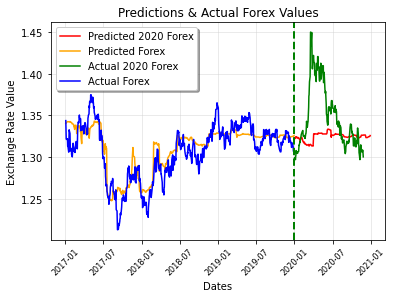

In [26]:
start_plotting_date = '2017-01-02'
plotting(start_plotting_date, df_future_predictions, df_training_predictions, dataset_train, country_code, df_2020)
#16 epochs

In [27]:
output_notebook()
bokeh_plotting(df_future_predictions, country_code, df_training_predictions, dataset_train, df_2020)

Loading BokehJS ...

In [28]:
eval_metrics(dataset_train, df_training_predictions, country_code)

RMSE: 0.020308557274882528
RMSE of Scaled Values: 0.11708069286130811
R2_Score: 0.985981371787903
R2_Score of Scaled Values: 0.986292111359116
